# PCA analysis on all patients' data

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("Imputed_ALLdata_Ivan.csv")
df

,LLHold,LLLatency,LRHold,LRLatency,LSHold,LSLatency,RLHold,RLLatency,RRHold,RRLatency,...,RHoldKurt,RLatencyKurt,SHoldKurt,SLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,HoldMean,LatencyMean,Parkinsons
0,82.169040,263.586377,81.946810,277.610541,113.966144,205.839312,74.671148,416.856331,79.294563,273.864624,...,44.944694,-1.138668,18.938591,2.047950,-1.555339,-10.278246,-139.245790,87.090011,286.112183,1
1,97.654140,406.716242,107.138017,411.718182,134.881818,328.748864,100.917949,430.258974,96.400784,365.736471,...,110.960777,-0.838186,0.696979,0.597395,-2.663930,40.979771,-18.540793,102.873688,405.924138,0
2,143.399528,347.882547,105.325886,313.541489,94.020690,338.639655,163.700000,310.799454,106.208750,322.170833,...,24.142310,-0.177558,6.900573,-0.340523,48.079984,25.711714,2.742036,123.793469,325.569638,0
3,87.418105,316.334084,95.753906,351.168548,95.613694,355.430828,91.759075,311.695939,87.046902,338.282118,...,2.216855,-0.447737,6.529645,-0.368982,-1.529482,-21.948033,39.472609,90.409640,327.473805,1
4,81.947761,360.546269,88.875000,460.950000,92.927778,424.529894,78.100000,240.200000,83.886364,355.140909,...,2.232887,3.726850,66.079168,10.284850,-2.262416,5.405360,220.750000,90.442364,406.111687,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,114.451691,380.816425,114.250244,378.445122,118.110000,275.342000,109.490793,322.538107,107.901394,379.116725,...,0.690160,0.117846,3.939433,4.542159,0.311773,1.699700,55.907015,112.126444,363.161854,1
187,109.729223,353.762243,110.151315,353.846670,119.099873,381.563104,114.032972,347.541292,108.025824,359.277471,...,14.220614,-0.231702,6.849089,-0.533829,2.120533,-5.515228,6.305378,111.292535,358.254872,1
188,80.446667,288.293333,93.760000,353.140000,101.600000,345.700000,92.071429,403.742857,91.800000,314.466667,...,1.291153,0.341831,3.693052,2.262993,-6.379487,-26.173333,-50.602857,88.709615,337.600000,1
189,101.543809,158.094059,92.716100,153.591263,88.772980,173.464290,97.558775,142.231463,95.320305,169.229961,...,-0.046371,1.663209,0.535376,0.230168,3.168687,-11.135901,11.359799,93.502747,157.165172,1


In [3]:
X = df.iloc[:,0:101]
y = df.iloc[:,101]  # Target is the Parkinsons column


In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)

In [4]:
from sklearn.model_selection import train_test_split


# test train split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = .2,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y)

In [5]:
## Import StandardScaler and Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [15]:
## Make your pipe and fit it here

#Pipeline([ (name,object), (name,object)      ])

## Sample Answer
pipe = Pipeline([('scale',StandardScaler()),
                    ('pca',PCA(n_components = 101))])

pipe.fit(X_train)

## Store your transformed data here
fit = pipe.transform(X_train)

fit

array([[ 1.56379659e+00, -1.54747302e+00,  2.29646308e+00, ...,
        -4.61202898e-10, -1.00106111e-10, -5.95470292e-11],
       [ 2.83616512e+00,  4.93061560e+00, -2.35648541e-01, ...,
         5.63886981e-10, -1.31472095e-11, -1.77771164e-10],
       [-6.17142472e+00,  4.44860294e+00, -2.13887728e+00, ...,
         3.08762108e-10,  2.80393623e-10,  1.80384074e-10],
       ...,
       [ 3.17561912e+00, -2.19639576e+00, -2.80919001e+00, ...,
         1.07139775e-10,  1.41001179e-10,  1.68620402e-11],
       [ 8.24583901e+00,  3.20072005e+00, -1.46490255e+00, ...,
         4.31985619e-10, -2.15241323e-10,  1.19058671e-11],
       [ 5.60500970e-01, -3.41122669e+00,  3.95364543e+00, ...,
        -1.27959528e-12, -2.59632893e-11, -8.60331692e-11]])

In [ ]:
#pca = PCA(n_components = 100)
#pca.fit(X)

<IPython.core.display.Javascript object>


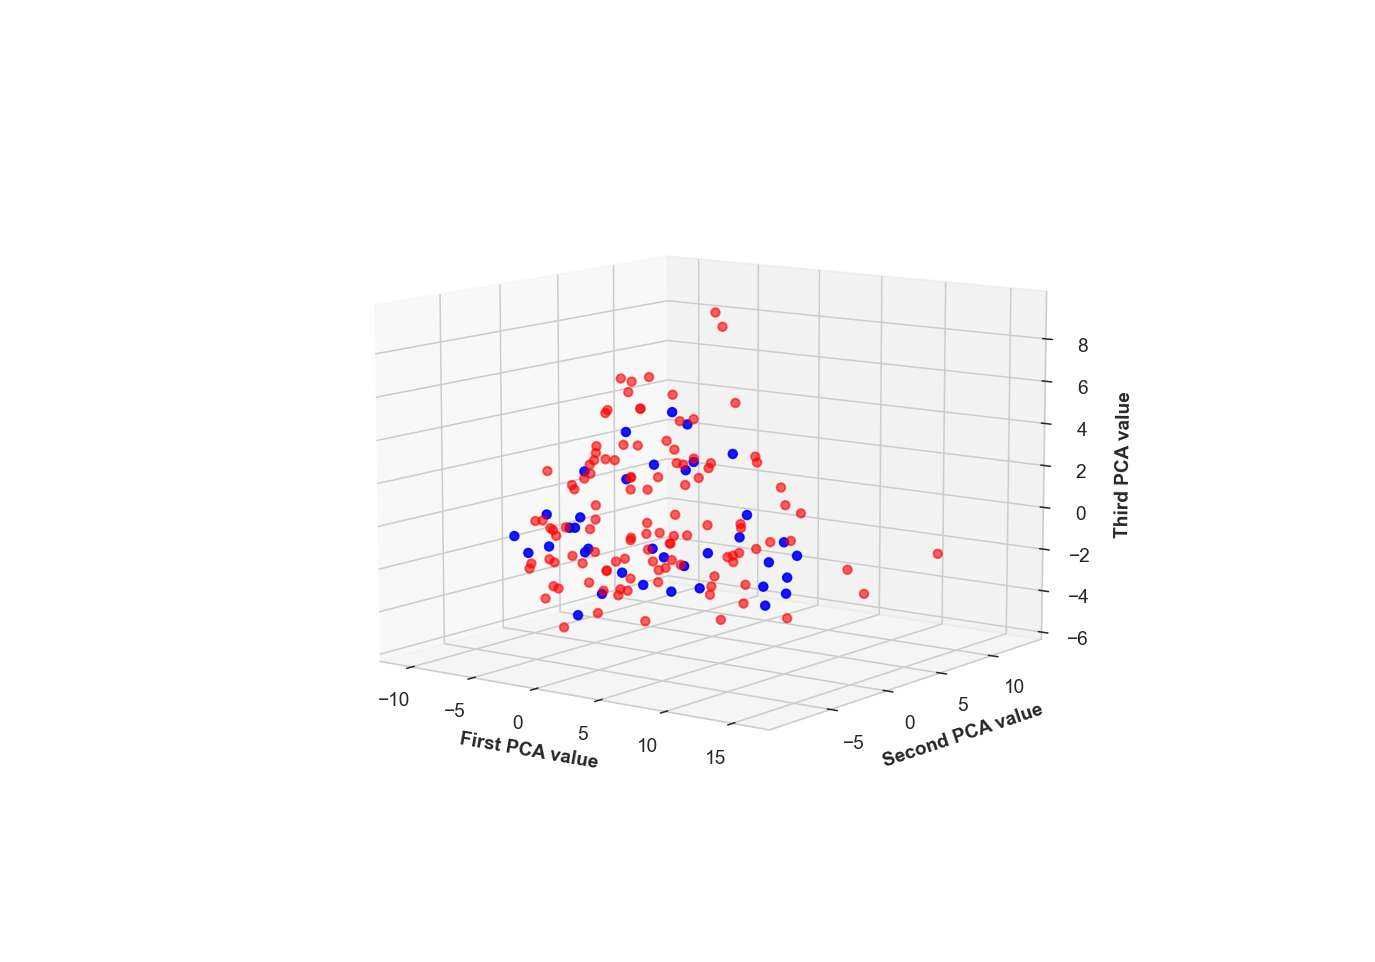

Text(0.5, 0, 'Third PCA value')

In [23]:
%matplotlib notebook


fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(fit[y_train==0, 0], fit[y_train==0, 1], fit[y_train==0, 2],
            alpha=.9, color="blue", label="no PD")

ax.scatter3D(fit[y_train==1, 0], fit[y_train==1, 1], fit[y_train==1, 2], 
            alpha=.6, color="red", label="PD")

ax.set_xlabel("First PCA value", fontweight ='bold')
ax.set_ylabel("Second PCA value", fontweight ='bold')
ax.set_zlabel("Third PCA value", fontweight ='bold')

In [24]:
pipe = Pipeline([('scale',StandardScaler()),
                    ('pca',PCA(n_components = 101))])


pipe.fit(X_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=101))])

In [25]:
pd.DataFrame({'pca_1':pipe['pca'].components_[0,:],
              'pca_2':pipe['pca'].components_[1,:]},
            index = [X.columns]).sort_values('pca_1')

,pca_1,pca_2
LLLatency,-0.167393,-0.041610
LatencyMean,-0.167278,-0.074041
LLatency,-0.165537,-0.075176
RRLatency,-0.165058,-0.057004
SLatency,-0.164114,-0.044100
...,...,...
RLatencyKurt,0.149321,0.070491
LLLatencyKurt,0.150862,0.046583
LLLatencySkew,0.153589,0.045325
LLatencyKurt,0.154680,0.079828


<IPython.core.display.Javascript object>


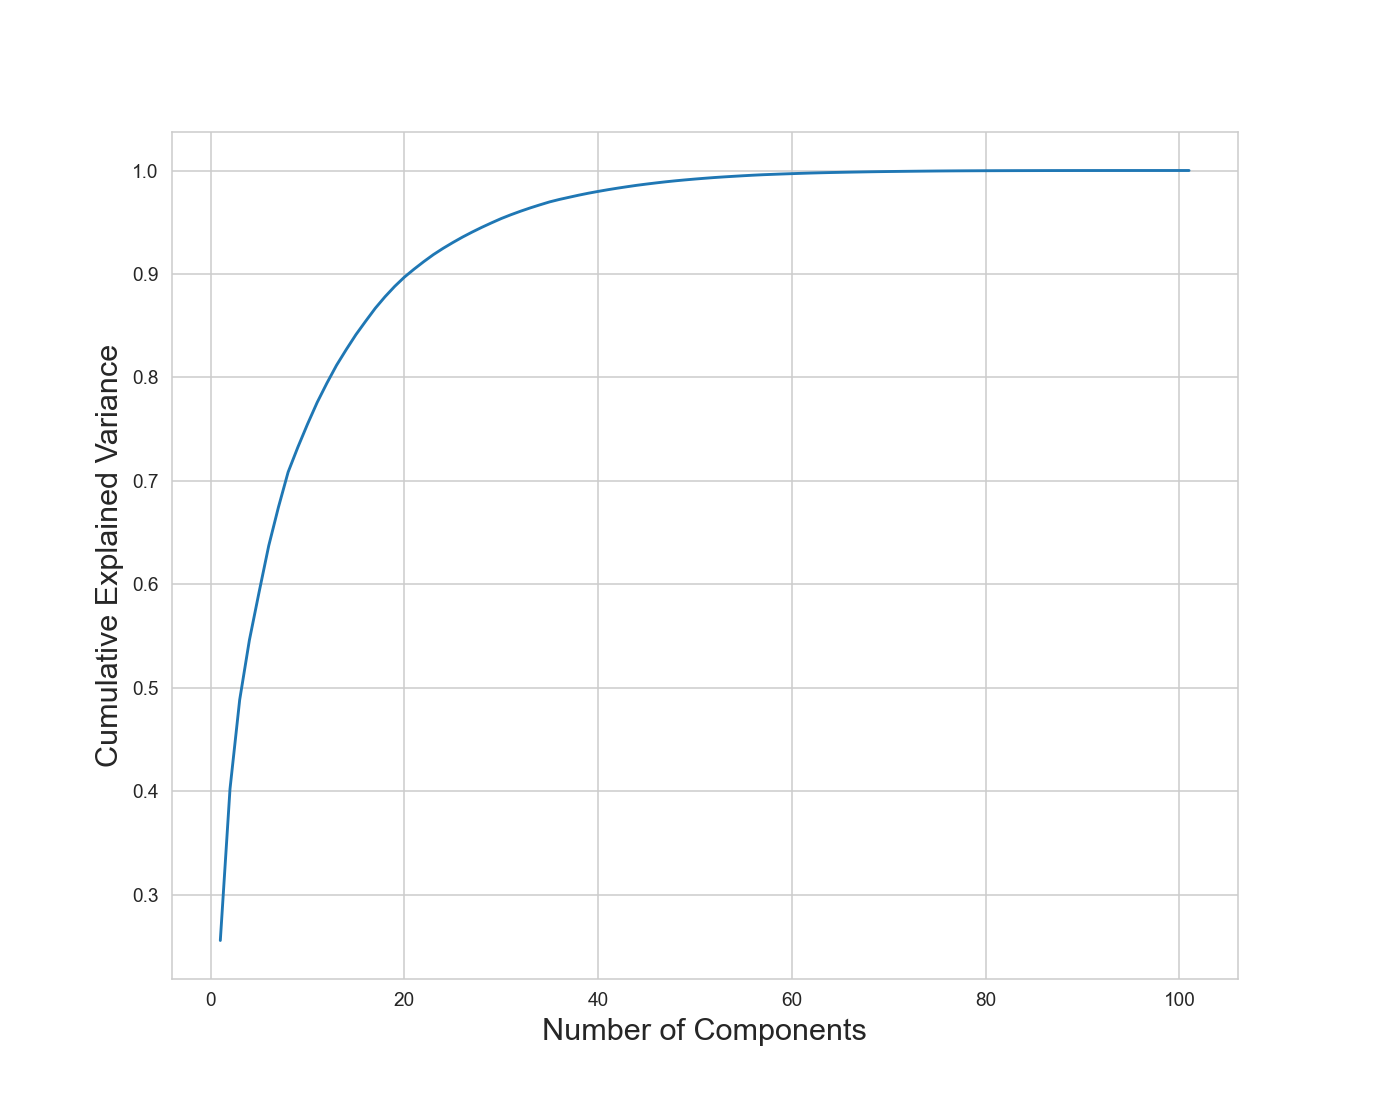

In [27]:
## Plot the Cumulative Explained Variance Ratio

## Sample Answer
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))


plt.plot(range(1,102),np.cumsum(pipe['pca'].explained_variance_ratio_))

plt.xlabel("Number of Components", fontsize=16)
plt.ylabel("Cumulative Explained Variance", fontsize=16)

plt.show()

In [28]:
## Remake the pipeline here

## Sample Answer
pipe = Pipeline([('scale',StandardScaler()),
                    ('pca',PCA(n_components = .95))])


pipe.fit(X_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=0.95))])

In [33]:
## Fit the pipe here

## Sample Answer
fit = pipe.transform(X_train)

## Find the number of pca components that resulted here

## Sample Answer
print("The PCA had",np.shape(fit)[1],"components.")


The PCA had 30 components.


<IPython.core.display.Javascript object>


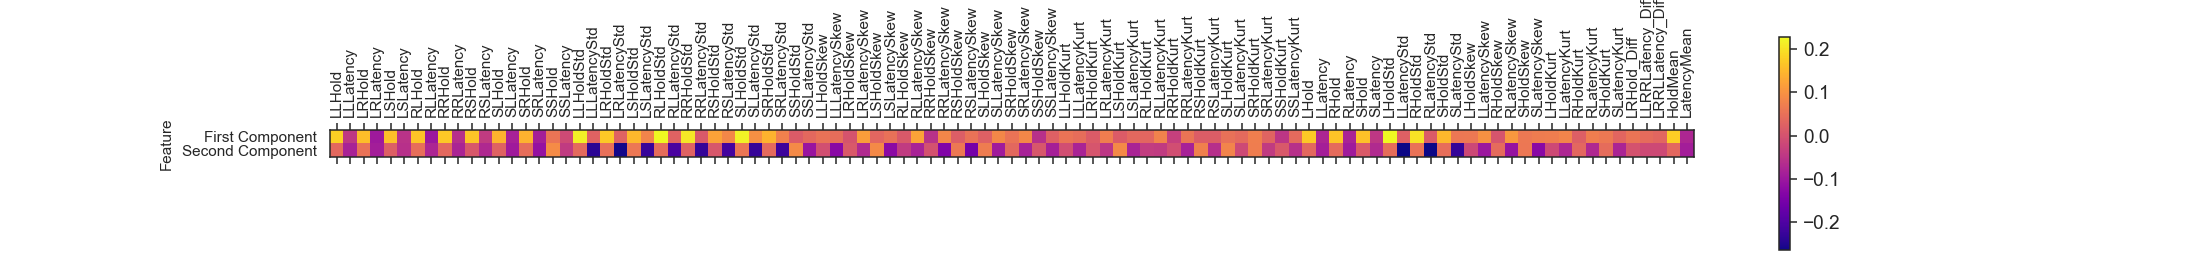

In [30]:
#plt.figure(figsize=(12,14))


sns.set_style("white")


plt.matshow(pipe['pca'].components_[1:3,:], cmap = 'plasma')

plt.yticks([0,1], 
           ["First Component", "Second Component"],
        fontsize = 8)

plt.colorbar()

plt.xticks(range(len(X.columns)),
           X.columns,
           rotation=90,
           fontsize = 8)

plt.ylabel("Feature", fontsize = 8)

plt.show()

<IPython.core.display.Javascript object>


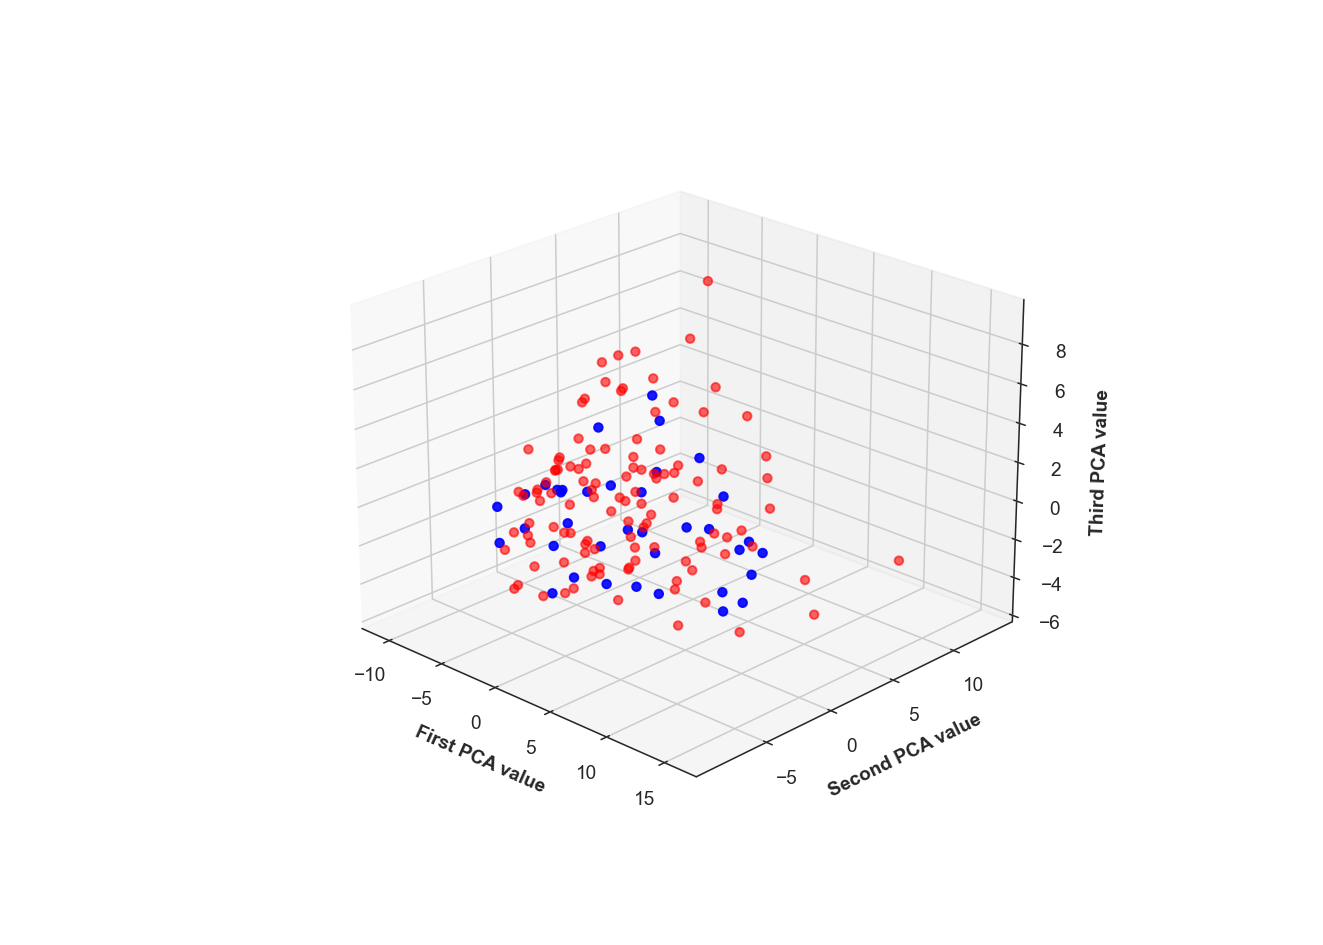

Text(0.5, 0, 'Third PCA value')

In [36]:
fig = plt.figure(figsize = (7, 5))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(fit[y_train==0, 0], fit[y_train==0, 1], fit[y_train==0, 2],
            alpha=.9, color="blue", label="no PD")

ax.scatter3D(fit[y_train==1, 0], fit[y_train==1, 1], fit[y_train==1, 2], 
            alpha=.6, color="red", label="PD")

ax.set_xlabel("First PCA value", fontweight ='bold')
ax.set_ylabel("Second PCA value", fontweight ='bold')
ax.set_zlabel("Third PCA value", fontweight ='bold')

In [37]:
plt.close()